<a href="https://colab.research.google.com/github/bluecontainer/maddypython/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import pandas as pd
from functools import partial

def calc_nextvalue(init, a, prevvalue, i):
    if prevvalue == 0:
        prevvalue = init
    return a * prevvalue * (1 - prevvalue)

def calc_forrange(period, init, a):
    rangevalues = np.arange(period)
    partialcalc = partial(calc_nextvalue, init, a)
    calc = np.frompyfunc(partialcalc, 2, 1)
    result = calc.accumulate(rangevalues)
    return result
    # return pd.DataFrame(data=result, columns=['populationfraction'])


In [2]:
a = 2
# this doesn't change
print(calc_forrange(50, 0.5, a)[-1])
print(calc_forrange(50, 0.1, a)[-1])

a = 2.5
print(calc_forrange(50, 0.1, a)[-1])
print(calc_forrange(50, 0.9, a)[-1])

a = 1.5
print(calc_forrange(50, 0.2, a)[-1])
print(calc_forrange(50, 0.6, a)[-1])

0.5
0.5
0.6000000000000002
0.6000000000000002
0.33333333333333276
0.3333333333333335


In [3]:
import numpy as np
from functools import partial

def printtail():
  iterations = 5000
  init = 0.1
  range = [2.8, 3.2, 3.6, 4]
  results = np.frompyfunc(partial(calc_forrange, iterations, init), 1, 1)(range)

  for result in results:
    print(np.diff(result[-10:]))

printtail()

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.28641098093474027 -0.28641098093474027 0.28641098093474027
 -0.28641098093474027 0.28641098093474027 -0.28641098093474027
 0.28641098093474027 -0.28641098093474027 0.28641098093474027]
[-0.45748883946218794 0.4604669382571081 -0.46840116119775105
 0.46309306004696743 -0.4489957910312591 0.4581142767198093
 -0.4824562567987289 0.4658134660019086 -0.4218360143842548]
[0.4738751062572447 0.13993385595113028 -0.302248583932068
 0.4566008980484987 -0.9716874766183007 0.06582499193682693
 0.23405438279276047 0.5514764729756539 -0.4334240824725181]


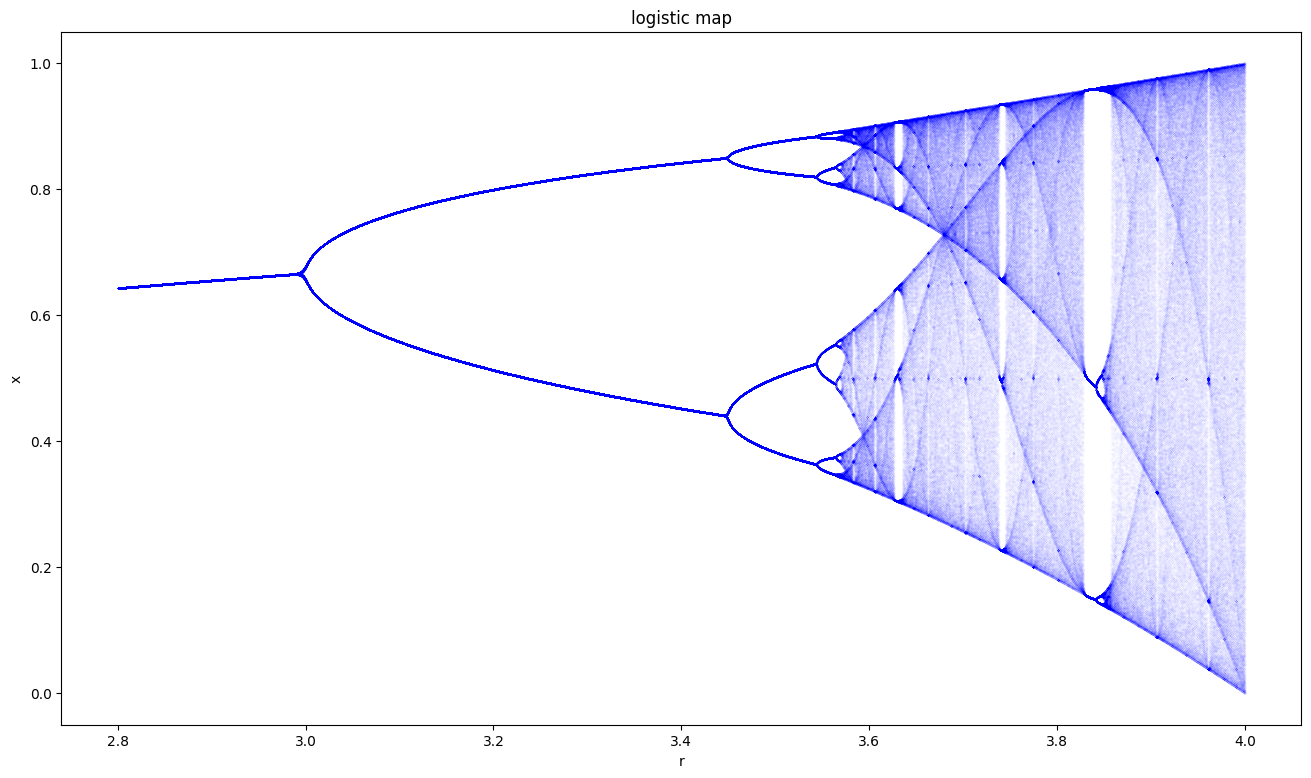

In [12]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

def plotlogisticmap1():
  iterations = 600
  init = 0.1
  increment = 0.0001
  avalues = np.arange(2.8, 4, increment)

  results = np.frompyfunc(partial(calc_forrange, iterations, init), 1, 1)(avalues)

  fig, biax = plt.subplots()
  fig.set_size_inches(16, 9)
  for r in range(avalues.size):
    biax.plot([avalues[r]] * 200, results[r][iterations - 200 :], "b.", markersize=0.02)
  biax.set(xlabel="r", ylabel="x", title="logistic map")
  plt.show()

plotlogisticmap1()

<a href="https://en.wikipedia.org/wiki/Logistic_map#Graphical_representation">Wikipedia Reference</a>

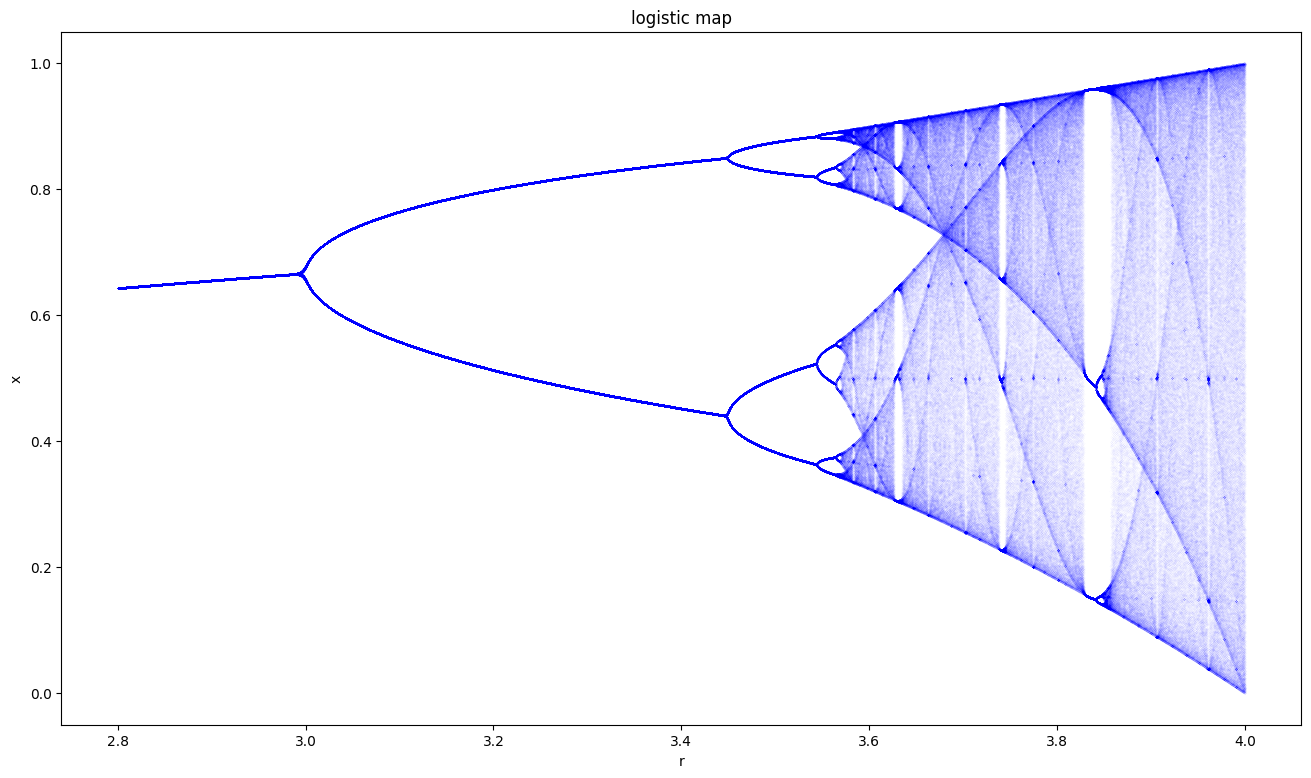

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plotlogisticmap():
  interval = (2.8, 4)  # start, end
  accuracy = 0.0001
  reps = 600  # number of repetitions
  numtoplot = 200
  lims = np.zeros(reps)

  fig, biax = plt.subplots()
  fig.set_size_inches(16, 9)

  lims[0] = np.random.rand()
  for r in np.arange(interval[0], interval[1], accuracy):
      for i in range(reps - 1):
          lims[i + 1] = r * lims[i] * (1 - lims[i])

      biax.plot([r] * numtoplot, lims[reps - numtoplot :], "b.", markersize=0.02)

  biax.set(xlabel="r", ylabel="x", title="logistic map")
  plt.show()

plotlogisticmap()